<a href="https://colab.research.google.com/github/Albina-Agametova/VKR_Agametova_AS/blob/main/VKR_Agametova_AS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import seaborn as sns
%matplotlib inline
from pandas import read_excel, DataFrame, Series
import tensorflow as tf
from tensorflow import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [12]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from yellowbrick.regressor import PredictionError, ResidualsPlot

In [13]:
X_nup = pd.read_excel("/content/sample_data/X_nup.xlsx", index_col=0)
X_nup.head(3)

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0.0,0.0,4.0,57.0
1.0,0.0,4.0,60.0
2.0,0.0,4.0,70.0


In [14]:
X_bp = pd.read_excel("/content/sample_data/X_bp.xlsx", index_col = 0)
X_bp.head(3)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,1.857143,2030.0,738.736842,30.0,22.267857,100.000000,210.0,70.0,3000.0,220.0
1,1.857143,2030.0,738.736842,50.0,23.750000,284.615385,210.0,70.0,3000.0,220.0
2,1.857143,2030.0,738.736842,49.9,33.000000,284.615385,210.0,70.0,3000.0,220.0


In [15]:
#Для объединения  двух датасетов был использован метод ".merge()" с параметром "inner"
df = X_nup.merge(X_bp, left_index = True, right_index = True, how = 'inner')
df.head(3)

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0.0,4.0,57.0,1.857143,2030.0,738.736842,30.0,22.267857,100.000000,210.0,70.0,3000.0,220.0
1,0.0,4.0,60.0,1.857143,2030.0,738.736842,50.0,23.750000,284.615385,210.0,70.0,3000.0,220.0
2,0.0,4.0,70.0,1.857143,2030.0,738.736842,49.9,33.000000,284.615385,210.0,70.0,3000.0,220.0


Информация объединенного датасета о типе данных, объеме, а также проверка на пропуски и повторяющиеся значения

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Угол нашивки, град                    1023 non-null   float64
 1   Шаг нашивки                           1023 non-null   float64
 2   Плотность нашивки                     1023 non-null   float64
 3   Соотношение матрица-наполнитель       1023 non-null   float64
 4   Плотность, кг/м3                      1023 non-null   float64
 5   модуль упругости, ГПа                 1023 non-null   float64
 6   Количество отвердителя, м.%           1023 non-null   float64
 7   Содержание эпоксидных групп,%_2       1023 non-null   float64
 8   Температура вспышки, С_2              1023 non-null   float64
 9   Поверхностная плотность, г/м2         1023 non-null   float64
 10  Модуль упругости при растяжении, ГПа  1023 non-null   float64
 11  Прочность при рас

In [17]:
df.duplicated().sum()

0

Описательная статистика полученных данных


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
"Угол нашивки, град",1023.0,44.252199,45.015793,0.000000,0.000000,0.000000,90.000000,90.000000
Шаг нашивки,1023.0,6.899222,2.563467,0.000000,5.080033,6.916144,8.586293,14.440522
Плотность нашивки,1023.0,57.153929,12.350969,0.000000,49.799212,57.341920,64.944961,103.988901
Соотношение матрица-наполнитель,1023.0,2.930366,0.913222,0.389403,2.317887,2.906878,3.552660,5.591742
"Плотность, кг/м3",1023.0,1975.734888,73.729231,1731.764635,1924.155467,1977.621657,2021.374375,2207.773481
"модуль упругости, ГПа",1023.0,739.923233,330.231581,2.436909,500.047452,739.664328,961.812526,1911.536477
"Количество отвердителя, м.%",1023.0,110.570769,28.295911,17.740275,92.443497,110.564840,129.730366,198.953207
"Содержание эпоксидных групп,%_2",1023.0,22.244390,2.406301,14.254985,20.608034,22.230744,23.961934,33.000000
"Температура вспышки, С_2",1023.0,285.882151,40.943260,100.000000,259.066528,285.896812,313.002106,413.273418
"Поверхностная плотность, г/м2",1023.0,482.731833,281.314690,0.603740,266.816645,451.864365,693.225017,1399.542362


Оценка выбросов и парной корреляции ненормализованных данных

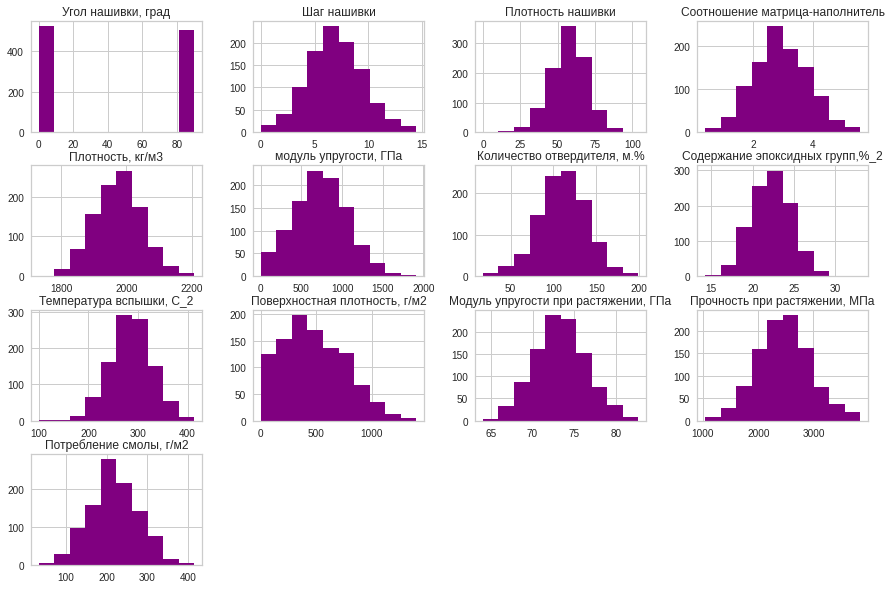

In [19]:
df.hist(figsize=(15,10), color='purple')
plt.show()

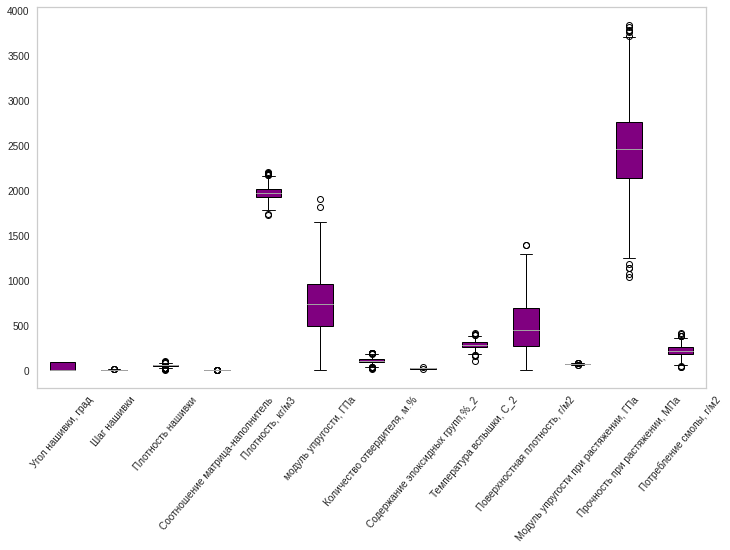

In [20]:
plt.figure(figsize=(12, 7))
box = df.boxplot(column=['Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки',
                               'Соотношение матрица-наполнитель', 'Плотность, кг/м3', 'модуль упругости, ГПа', 'Количество отвердителя, м.%', 
                               'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2', 'Поверхностная плотность, г/м2', 
                               'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа', 'Потребление смолы, г/м2'], 
                  patch_artist=True, meanline=True, vert=True, rot = 50, grid = False, labels = df.columns,
                  boxprops=dict(facecolor='purple'))
plt.show()

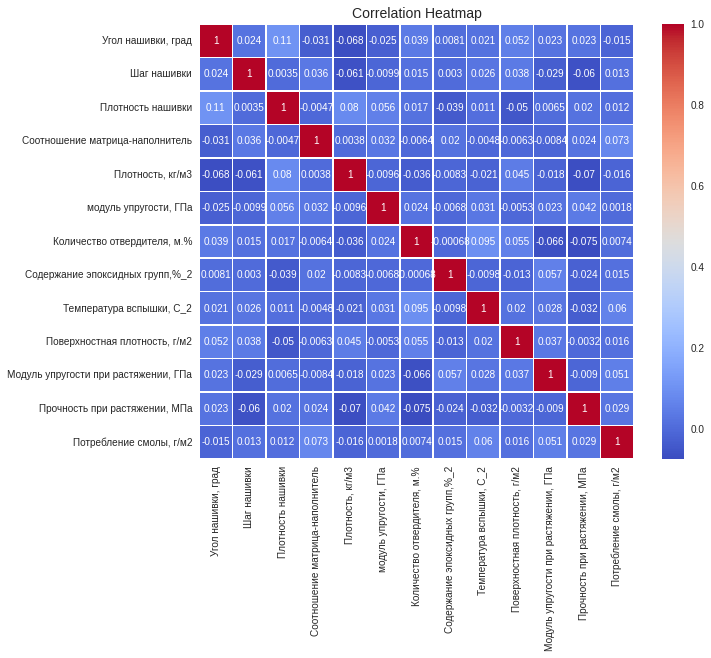

In [98]:
corr = df.corr().round(3)
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, linewidths=.5, square=True, cmap='coolwarm')
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

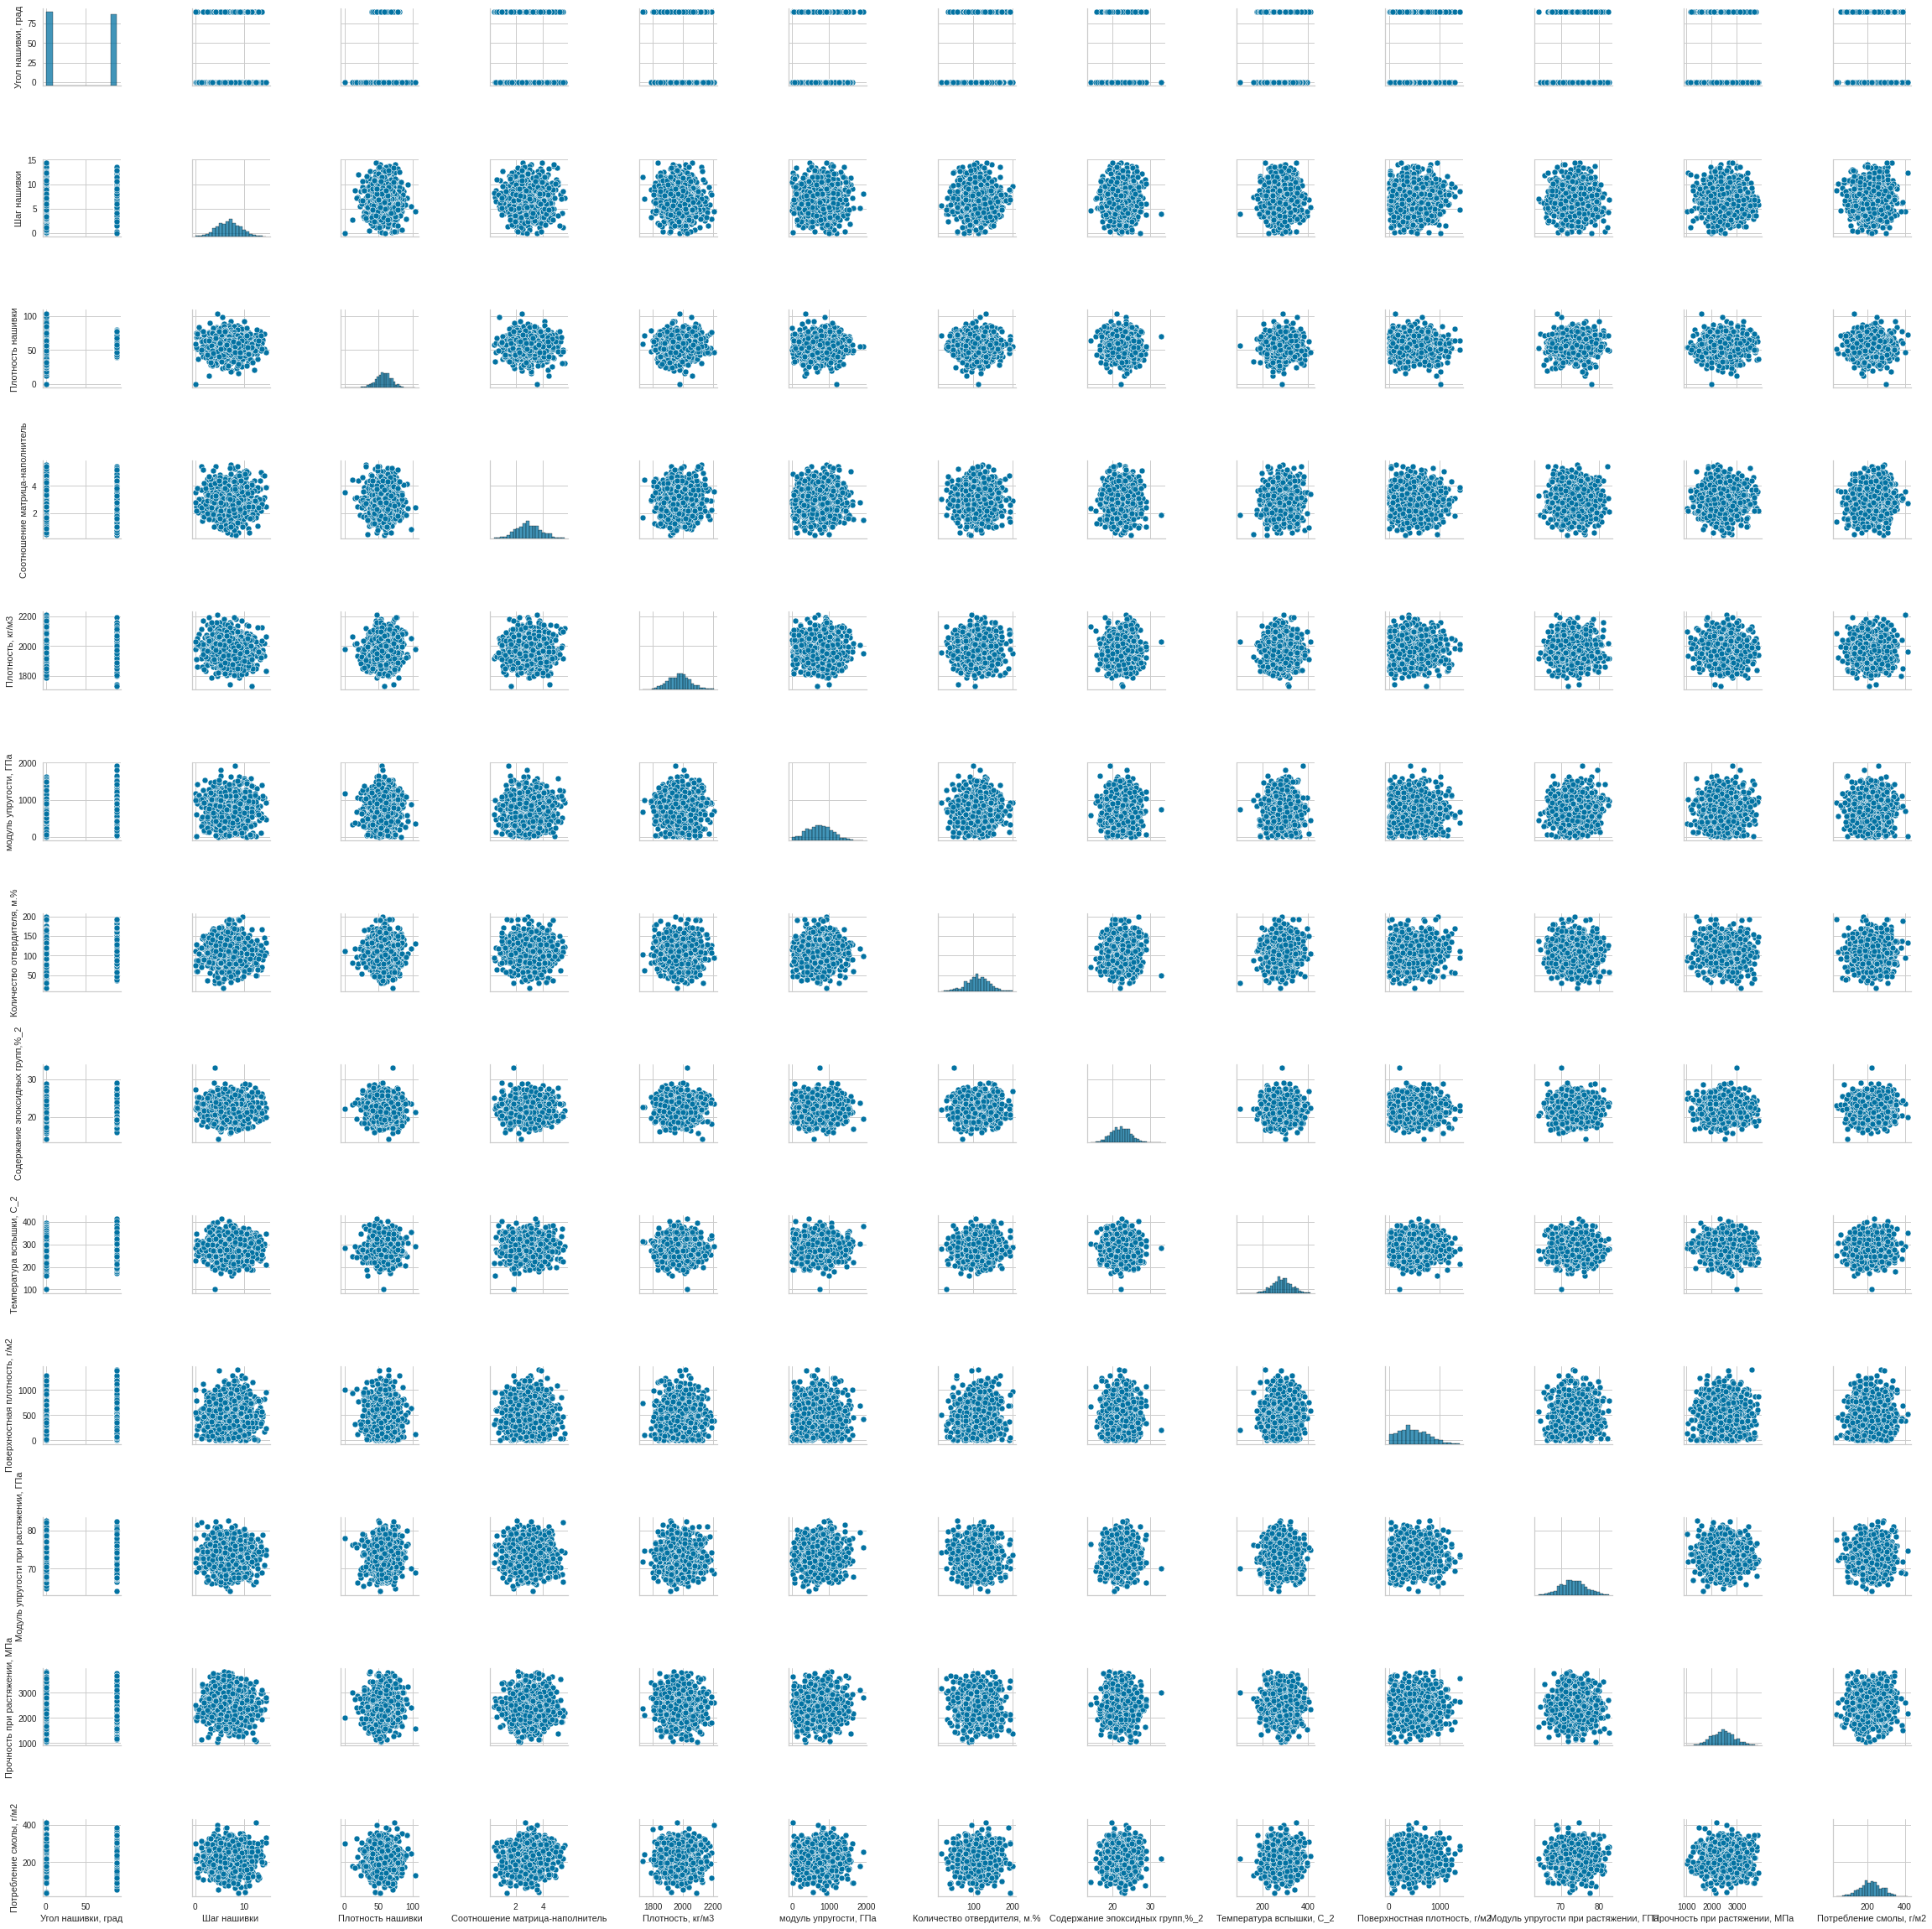

In [22]:
sns.pairplot(df, palette='muted')

Выбросы есть во всех исходных данных, кроме "Угла нашивки", где можно наблюдать только два постоянных значения.
Корреляция у данных очень низкая - линейная модель скорее всего будет малоэффективной

Оценка цифровых значений (min, max, average, mean)

In [23]:
df.columns

Index(['Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки',
       'Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2'],
      dtype='object')

In [24]:
for col in df.columns:
    print(col)
    
   
    print("Минимальное значение: ", end=" ")
    print(min(df[col]))
  
    print("Максимальное значение: ", end=" ")
    print(max(df[col]))
   
    print("Среднее значение: ", end=" ")
    print(np.mean(df[col]))
   
    print("Медианное значение: ", end=" ")
    print(np.median(df[col]))
    print("\n\n")

Угол нашивки, град
Минимальное значение:  0.0
Максимальное значение:  90.0
Среднее значение:  44.252199413489734
Медианное значение:  0.0



Шаг нашивки
Минимальное значение:  0.0
Максимальное значение:  14.4405218753969
Среднее значение:  6.899222077675024
Медианное значение:  6.9161438559491



Плотность нашивки
Минимальное значение:  0.0
Максимальное значение:  103.988901301494
Среднее значение:  57.15392943285763
Медианное значение:  57.3419198469929



Соотношение матрица-наполнитель
Минимальное значение:  0.389402605178414
Максимальное значение:  5.59174159869754
Среднее значение:  2.9303657734325506
Медианное значение:  2.90687765033521



Плотность, кг/м3
Минимальное значение:  1731.764635096
Максимальное значение:  2207.77348061119
Среднее значение:  1975.7348881101548
Медианное значение:  1977.62165679058



модуль упругости, ГПа
Минимальное значение:  2.4369087535075
Максимальное значение:  1911.53647700054
Среднее значение:  739.9232327560719
Медианное значение:  739.664327

Нормализация данных

In [25]:
scaler = MinMaxScaler()
norm_df = pd.DataFrame(scaler.fit_transform(df),
           columns = df.columns, index = df.index).round(3)
norm_df.head(5)

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0.0,0.277,0.548,0.282,0.627,0.386,0.068,0.427,0.000,0.15,0.319,0.698,0.489
1,0.0,0.277,0.577,0.282,0.627,0.386,0.178,0.507,0.589,0.15,0.319,0.698,0.489
2,0.0,0.277,0.673,0.282,0.627,0.386,0.177,1.000,0.589,0.15,0.319,0.698,0.489
3,0.0,0.346,0.452,0.282,0.627,0.386,0.614,0.373,0.638,0.15,0.319,0.698,0.489
4,0.0,0.346,0.548,0.458,0.627,0.393,0.519,0.427,0.589,0.15,0.319,0.698,0.489


In [26]:
norm_df.describe().T

,count,mean,std,min,25%,50%,75%,max
"Угол нашивки, град",1023.0,0.491691,0.500175,0.0,0.0000,0.000,1.0000,1.0
Шаг нашивки,1023.0,0.477763,0.177518,0.0,0.3520,0.479,0.5950,1.0
Плотность нашивки,1023.0,0.549614,0.118772,0.0,0.4785,0.551,0.6245,1.0
Соотношение матрица-наполнитель,1023.0,0.488422,0.175554,0.0,0.3705,0.484,0.6080,1.0
"Плотность, кг/м3",1023.0,0.512526,0.154903,0.0,0.4040,0.516,0.6080,1.0
"модуль упругости, ГПа",1023.0,0.386300,0.172971,0.0,0.2605,0.386,0.5025,1.0
"Количество отвердителя, м.%",1023.0,0.512272,0.156130,0.0,0.4120,0.512,0.6180,1.0
"Содержание эпоксидных групп,%_2",1023.0,0.426212,0.128384,0.0,0.3390,0.425,0.5180,1.0
"Температура вспышки, С_2",1023.0,0.593348,0.130698,0.0,0.5080,0.593,0.6800,1.0
"Поверхностная плотность, г/м2",1023.0,0.344641,0.201093,0.0,0.1905,0.323,0.4950,1.0


Анализ и удаление выбросов

In [27]:
for x in norm_df:
    q75,q25 = np.percentile(norm_df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    norm_df.loc[norm_df[x] < min,x] = np.nan
    norm_df.loc[norm_df[x] > max,x] = np.nan
norm_df.isnull().sum()

Угол нашивки, град                       0
Шаг нашивки                              4
Плотность нашивки                       20
Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
dtype: int64

In [28]:
norm_df = norm_df.dropna(axis = 0)
norm_df.isnull().sum()

Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
dtype: int64

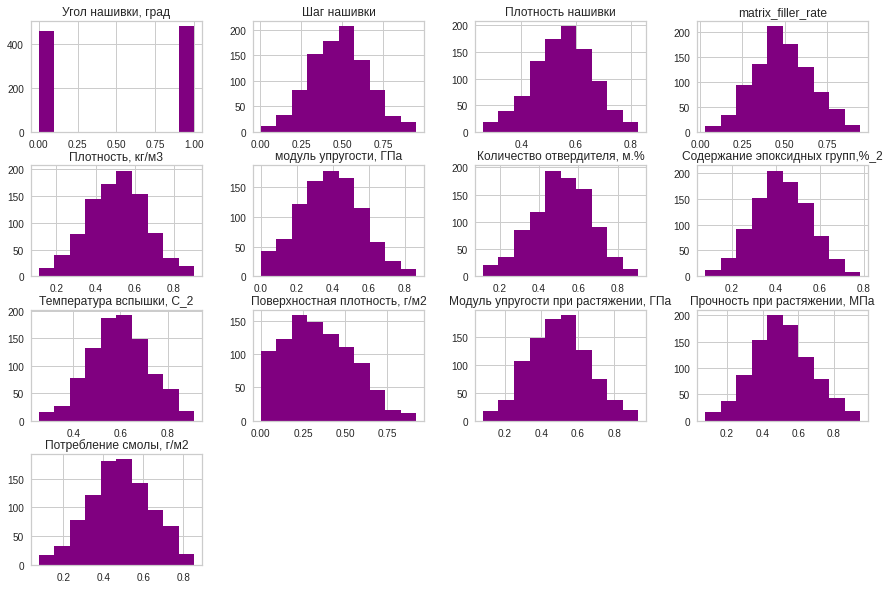

In [90]:
norm_df.hist(figsize=(15,10), color='purple')
plt.show()

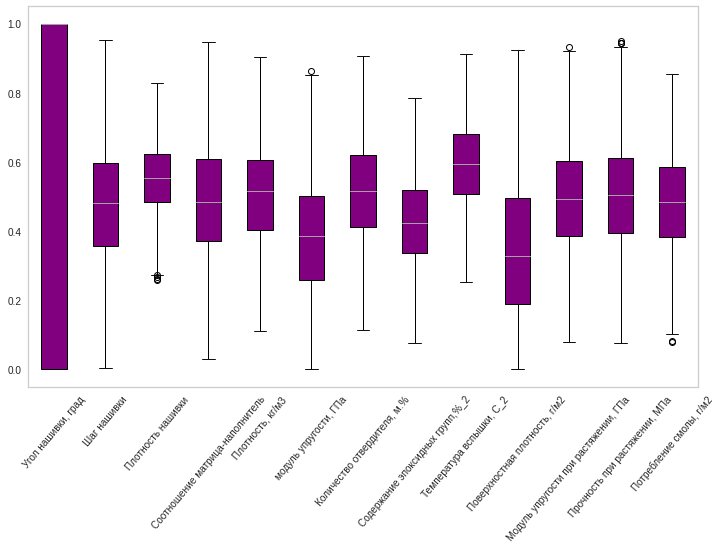

In [29]:
plt.figure(figsize=(12, 7))
box = norm_df.boxplot(column=['Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки',
                               'Соотношение матрица-наполнитель', 'Плотность, кг/м3', 'модуль упругости, ГПа', 'Количество отвердителя, м.%', 
                               'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2', 'Поверхностная плотность, г/м2', 
                               'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа', 'Потребление смолы, г/м2'], 
                  patch_artist=True, meanline=True, vert=True, grid = False, labels = norm_df.columns, rot=50,
                  boxprops=dict(facecolor='purple'))
plt.show()

# Модели

# Модуль упругости при растяжении



In [30]:
x1 = norm_df.copy()
y1 = x1.pop('Модуль упругости при растяжении, ГПа')
y1

1       0.319
3       0.319
4       0.319
5       0.319
6       0.319
        ...  
1018    0.485
1019    0.476
1020    0.573
1021    0.536
1022    0.551
Name: Модуль упругости при растяжении, ГПа, Length: 937, dtype: float64

In [31]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, 
                                        test_size = 0.3, 
                                        random_state = 42)

Выберем одну метрику, среднюю абсолютную ошибку (mae) в прогнозах, и с её помощью будем оценивать модели. 
Среднюю абсолютную ошибку легко вычислить и интерпретировать.
Вычислим показатель для исходного базового уровня

In [99]:
def mae(y_true, y_pred):
    y_true, predictions = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(y_true - predictions))


baseline_guess = np.median(y1)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance for test data MAE is %0.4f" % mae(y1_test, baseline_guess))


The baseline guess is a score of 0.49
Baseline Performance for test data MAE is 0.1382


**LinearRegression**

In [33]:
lr_1 = LinearRegression()
lr_1.fit(x1_train, y1_train)
prediction_lr = lr_1.predict(x1_test)
lr_1_mae = np.mean(abs(prediction_lr - y1_test))

print('Linear Regression test data MAE is = %0.4f' % lr_1_mae)

Linear Regression test data MAE is = 0.1390


In [34]:
models = pd.DataFrame()

lr_1_model_result = pd.DataFrame({
    'MAE': np.mean(abs(prediction_lr - y1_test)),   
}, index=['Linear Regression'])
models = models.append(lr_1_model_result)

**KNeighborsRegressor**

In [35]:
KNN_1 = KNeighborsRegressor()
KNN_1.fit(x1_train, y1_train)
prediction_KNN = KNN_1.predict(x1_test)

KNN_1_mae = np.mean(abs(prediction_KNN - y1_test))

print('KNeighborsRegressor test data MAE is = %0.4f' % KNN_1_mae)

KNeighborsRegressor test data MAE is = 0.1503


In [36]:
KNN_1_model_result = pd.DataFrame({
    'MAE':np.mean(abs(prediction_KNN - y1_test)),   
}, index=['KNeighborsRegressor'])
models = models.append(KNN_1_model_result)

**DecisionTreeRegressor**



In [37]:
from sklearn import tree

DTR_1 = tree.DecisionTreeRegressor()
DTR_1.fit(x1_train, y1_train)

DTR_1_prediction = DTR_1.predict(x1_test)

DTR_1_mae = np.mean(abs(DTR_1_prediction - y1_test))

print('Decision Tree test data MAE is = %0.4f' % DTR_1_mae)

Decision Tree test data MAE is = 0.1901


In [38]:
DTR_1_model_result = pd.DataFrame({
    'MAE':np.mean(abs(DTR_1_prediction - y1_test)),   
}, index=['Decision Tree'])
models = models.append(DTR_1_model_result)

**GradientBoostingRegressor**

In [39]:
GB_1 = GradientBoostingRegressor()
GB_1.fit(x1_train, y1_train) 

GB_1_prediction = GB_1.predict(x1_test)

GB_1_mae = np.mean(abs(GB_1_prediction - y1_test))

print('GradientBoosting test data MAE is = %0.4f' % GB_1_mae)

GradientBoosting test data MAE is = 0.1420


In [40]:
GB_1_model_result = pd.DataFrame({
    'MAE':np.mean(abs(GB_1_prediction - y1_test)),   
}, index=['GradientBoosting'])
models = models.append(GB_1_model_result)

**Support Vector Machine (SVM)**

In [41]:
SVM_1 = svm.SVR()
SVM_1.fit(x1_train, y1_train)

SVM_1_prediction = SVM_1.predict(x1_test)
SVM_1_mae = np.mean(abs(SVM_1_prediction - y1_test))

print('Support Vector Machines test data MAE is = %0.4f' % SVM_1_mae)

Support Vector Machines test data MAE is = 0.1481


In [42]:
SVM_1_model_result = pd.DataFrame({
    'MAE':np.mean(abs(SVM_1_prediction - y1_test)),   
}, index=['Support Vector Machine (SVM)'])
models = models.append(SVM_1_model_result)

**RandomForestRegressor**

In [43]:
RF_1 = RandomForestRegressor(max_depth=10, random_state=0)
RF_1.fit(x1_train, y1_train)

RF_1_prediction = RF_1.predict(x1_test)
RF_1_mae = np.mean(abs(RF_1_prediction - y1_test))

print('Random Forest test data MAE is = %0.4f' % RF_1_mae)

Random Forest test data MAE is = 0.1394


In [44]:
RF_1_model_result = pd.DataFrame({
    'MAE':np.mean(abs(RF_1_prediction - y1_test)),   
}, index=['Random Forest'])
models = models.append(RF_1_model_result)

In [45]:
models
models.style.highlight_min(axis=0)

,MAE
Linear Regression,0.138974
KNeighborsRegressor,0.150284
Decision Tree,0.190085
GradientBoosting,0.141967
Support Vector Machine (SVM),0.148111
Random Forest,0.139369


**Гиперпараметрическая оптимизация модели**

Для регуляризации линейной регресии воспользуемся методом ограничения весов Ridge или Lasso

In [46]:
from sklearn import linear_model
from sklearn.linear_model import Ridge, Lasso

In [105]:
Ridge_1 = linear_model.Ridge()
param_grid = {'alpha': [0.0001, 0.0002, 0.0003, 0.005, 0.05, 0.1, 1, 2, 5, 20], "fit_intercept": [True, False]}
GSCV = GridSearchCV(estimator=Ridge_1, param_grid=param_grid, cv=10, verbose=2)
GSCV.fit(x1_train, y1_train)
GSCV.best_params_ 

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] END ...................alpha=0.0001, fit_intercept=True; total time=   0.0s
[CV] END ...................alpha=0.0001, fit_intercept=True; total time=   0.0s
[CV] END ...................alpha=0.0001, fit_intercept=True; total time=   0.0s
[CV] END ...................alpha=0.0001, fit_intercept=True; total time=   0.0s
[CV] END ...................alpha=0.0001, fit_intercept=True; total time=   0.0s
[CV] END ...................alpha=0.0001, fit_intercept=True; total time=   0.0s
[CV] END ...................alpha=0.0001, fit_intercept=True; total time=   0.0s
[CV] END ...................alpha=0.0001, fit_intercept=True; total time=   0.0s
[CV] END ...................alpha=0.0001, fit_intercept=True; total time=   0.0s
[CV] END ...................alpha=0.0001, fit_intercept=True; total time=   0.0s
[CV] END ..................alpha=0.0001, fit_intercept=False; total time=   0.0s
[CV] END ..................alpha=0.0001, fit_i

{'alpha': 20, 'fit_intercept': True}

In [106]:
model1=GSCV.best_estimator_
model1.fit(x1_train, y1_train)
GSCV_prediction1 = GSCV.predict(x1_test)
mae = np.mean(abs(GSCV_prediction1 - y1_test))
accuracy = (1 - mae)*100

print('Model Performance')
print('Ridge test data MAE is = %0.6f' % mae)
print('Accuracy = {:0.2f}%.'.format(accuracy))

Model Performance
Ridge test data MAE is = 0.138452
Accuracy = 86.15%.


In [107]:
best_model1 = model1
best_model1.fit(x1, y1)
y1_pred_best = model1.predict(x1)

Text(0.5, 1.0, 'Best prediction model')

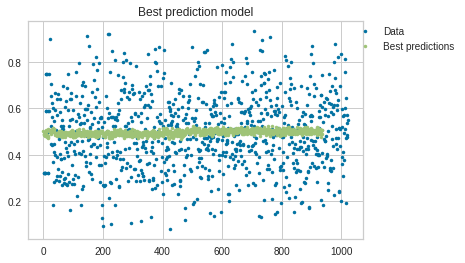

In [108]:
plt.plot(y1, 'H', marker='.')
plt.plot(y1_pred_best,'g.')

plt.legend(['Data', 'Best predictions'],bbox_to_anchor=(1.3,1.02))
plt.title('Best prediction model')

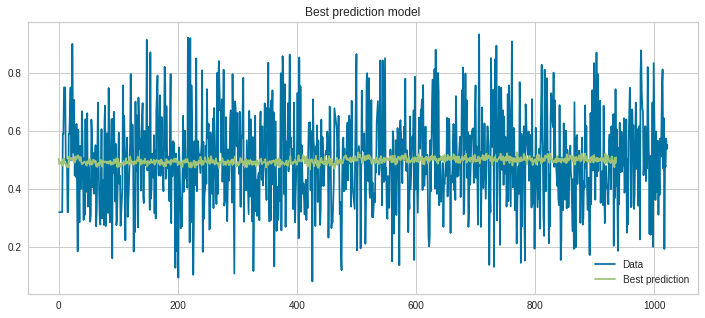

In [109]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(y1, label='Data')
ax.plot(y1_pred_best, label='Best prediction')
plt.title('Best prediction model')
ax.legend()
plt.show()

Модель стремится к самой высокой alpha - веса стремятся к нулю и в результате получается просто горизонтальная линия, пересекающая значения данных

# Прочность при растяжении

In [52]:
x2 = norm_df.copy()
y2 = x2.pop('Прочность при растяжении, МПа')
y2

1       0.698
3       0.698
4       0.698
5       0.698
6       0.698
        ...  
1018    0.480
1019    0.471
1020    0.578
1021    0.368
1022    0.647
Name: Прочность при растяжении, МПа, Length: 937, dtype: float64

In [53]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, 
                                        test_size = 0.3, 
                                        random_state = 42)

In [110]:
def mae(y_true, y_pred):
    y_true, predictions = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(y_true - predictions))

baseline_guess = np.median(y2)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance for test data MAE is %0.4f" % mae(y2_test, baseline_guess))
print('Accuracy = {:0.2f}%.'.format(accuracy))

The baseline guess is a score of 0.51
Baseline Performance for test data MAE is 0.1386
Accuracy = 86.15%.


**LinearRegression**

In [55]:
lr_2 = LinearRegression()
lr_2.fit(x2_train, y2_train)
prediction_lr = lr_2.predict(x2_test)
lr_2_mae = np.mean(abs(prediction_lr - y2_test))

print('Linear Regression test data MAE is = %0.4f' % lr_2_mae)

Linear Regression test data MAE is = 0.1387


In [56]:
models = pd.DataFrame()

lr_2_model_result = pd.DataFrame({
    'MAE': np.mean(abs(prediction_lr - y2_test)),   
}, index=['Linear Regression'])
models = models.append(lr_2_model_result)

**KNeighborsRegressor**

In [57]:
KNN_2 = KNeighborsRegressor()
KNN_2.fit(x2_train, y2_train)
prediction_KNN = KNN_2.predict(x2_test)

KNN_2_mae = np.mean(abs(prediction_KNN - y2_test))


print('KNeighborsRegressor test data MAE is = %0.4f' % KNN_2_mae)

KNeighborsRegressor test data MAE is = 0.1475


In [58]:
KNN_2_model_result = pd.DataFrame({
    'MAE':np.mean(abs(prediction_KNN - y2_test)),   
}, index=['KNeighborsRegressor'])
models = models.append(KNN_2_model_result)

**DecisionTreeRegressor**

In [59]:
DTR_2 = tree.DecisionTreeRegressor()
DTR_2.fit(x2_train, y2_train)

DTR_2_prediction = DTR_2.predict(x2_test)

DTR_2_mae = np.mean(abs(DTR_2_prediction - y2_test))

print('Decision Tree test data MAE is = %0.4f' % DTR_2_mae)

Decision Tree test data MAE is = 0.1807


In [60]:
DTR_2_model_result = pd.DataFrame({
    'MAE':np.mean(abs(DTR_2_prediction - y2_test)),   
}, index=['Decision Tree'])
models = models.append(DTR_2_model_result)

**GradientBoostingRegressor**

In [61]:

GB_2 = GradientBoostingRegressor()
GB_2.fit(x2_train, y2_train) 

GB_2_prediction = GB_2.predict(x2_test)

GB_2_mae = np.mean(abs(GB_2_prediction - y2_test))


print('GradientBoosting test data MAE is = %0.4f' % GB_2_mae)

GradientBoosting test data MAE is = 0.1400


In [62]:
GB_2_model_result = pd.DataFrame({
    'MAE':np.mean(abs(GB_2_prediction - y2_test)),   
}, index=['GradientBoosting'])
models = models.append(GB_2_model_result)

**Support Vector Machine (SVM)**

In [63]:

SVM_2 = svm.SVR()
SVM_2.fit(x2_train, y2_train)

SVM_2_prediction = SVM_2.predict(x2_test)
SVM_2_mae = np.mean(abs(SVM_2_prediction - y2_test))

print('Support Vector Machines test data MAE is = %0.4f' % SVM_2_mae)

Support Vector Machines test data MAE is = 0.1465


In [64]:
SVM_2_model_result = pd.DataFrame({
    'MAE':np.mean(abs(SVM_2_prediction - y2_test)),   
}, index=['Support Vector Machine (SVM)'])
models = models.append(SVM_2_model_result)

**RandomForestRegressor**

In [65]:
RF_2 = RandomForestRegressor(max_depth=10, random_state=0)
RF_2.fit(x2_train, y2_train)

RF_2_prediction = RF_2.predict(x2_test)
RF_2_mae = np.mean(abs(RF_2_prediction - y2_test))


print('Random Forest test data MAE is = %0.4f' % RF_2_mae)

Random Forest test data MAE is = 0.1377


In [66]:
RF_2_model_result = pd.DataFrame({
    'MAE':np.mean(abs(RF_2_prediction - y2_test)),   
}, index=['Random Forest'])
models = models.append(RF_2_model_result)

In [67]:
models
models.style.highlight_min(axis=0)

,MAE
Linear Regression,0.138724
KNeighborsRegressor,0.147503
Decision Tree,0.180741
GradientBoosting,0.139984
Support Vector Machine (SVM),0.146546
Random Forest,0.137706


# **Гиперпараметрическая оптимизация модели**

Лучший результат показала модель на основе RandomForestRegressor - для нее оптимизируем модель

In [68]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': ['auto'],
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
}

RF = RandomForestRegressor()

GSCV_RF = GridSearchCV(estimator = RF, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

GSCV_RF.fit(x2_train, y2_train)
GSCV_RF.best_params_

Fitting 3 folds for each of 40 candidates, totalling 120 fits


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'auto',
 'n_estimators': 100}

In [69]:
model2=GSCV_RF.best_estimator_
model2.fit(x2_train, y2_train)
GSCV_RF_prediction2 = GSCV_RF.predict(x2_test)
mae = np.mean(abs(GSCV_RF_prediction2 - y2_test))
accuracy = (1 - mae)*100

print('Model Performance')
print('Random Forest test data MAE is = %0.6f' % mae)
print('Accuracy = {:0.2f}%.'.format(accuracy))


Model Performance
Random Forest test data MAE is = 0.138205
Accuracy = 86.18%.


In [70]:
best_model2 = model2
best_model2.fit(x2, y2)
y2_pred_best = model2.predict(x2)

Text(0.5, 1.0, 'Best prediction model')

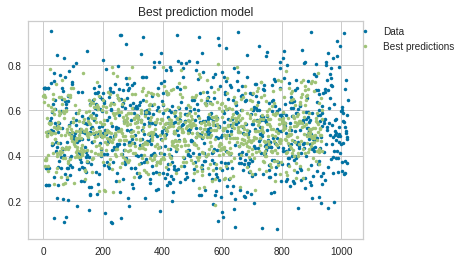

In [71]:
plt.plot(y2, 'H', marker='.')
plt.plot(y2_pred_best,'g.')

plt.legend(['Data', 'Best predictions'],bbox_to_anchor=(1.3,1.02))
plt.title('Best prediction model')

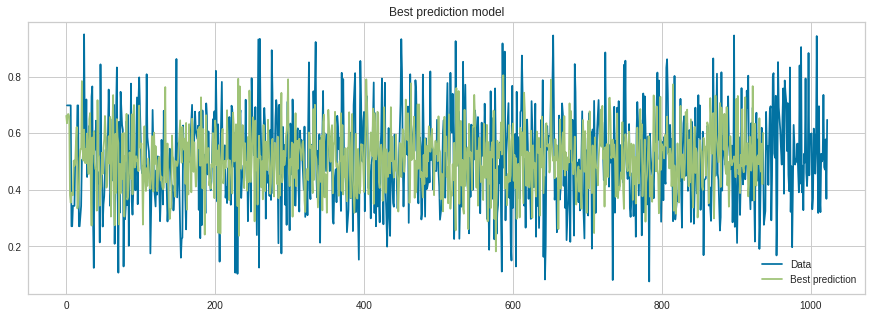

In [72]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(y2, label='Data')
ax.plot(y2_pred_best, label='Best prediction')
plt.title('Best prediction model')
ax.legend()
plt.show()

Показатель ошибки и точность предсказания модели не улучшились, остались примерно на том же уровне. 

# **Нейронная сеть для соотношения матрица-наполнитель**

In [73]:
norm_df.head(1)

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
1,0.0,0.277,0.577,0.282,0.627,0.386,0.178,0.507,0.589,0.15,0.319,0.698,0.489


In [74]:
norm_df = norm_df.rename(columns={"Соотношение матрица-наполнитель": "matrix_filler_rate"})
norm_df.head(1)

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,matrix_filler_rate,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
1,0.0,0.277,0.577,0.282,0.627,0.386,0.178,0.507,0.589,0.15,0.319,0.698,0.489


In [75]:
x_m = norm_df.drop(['matrix_filler_rate'], axis = 1)
y_m = norm_df.matrix_filler_rate

In [76]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x_m, y_m, test_size = 0.3, random_state=42)

In [77]:
x3_train.shape

(655, 12)

In [78]:
x3_test.shape

(282, 12)

In [79]:
def mae(y_true, y_pred):
    y_true, predictions = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(y_true - predictions))

baseline_guess = np.median(y_m)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance for test data: MAE = %0.6f" % mae(y3_test, baseline_guess))

The baseline guess is a score of 0.48
Baseline Performance for test data: MAE = 0.135312


In [80]:
model = Sequential()
model.add(Dense(30, activation = 'relu', input_dim=12 ))
model.add(Dense(20, activation = 'relu')) 
model.add(Dense(10, activation='relu')) 
model.add(Dense(1, activation = 'relu'))

model.compile(optimizer = 'adam', loss = 'mse', metrics=['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 20)                620       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [81]:
history = model.fit(x3_train, y3_train,
                   epochs = 30,
                   batch_size = 32, 
                   verbose = 1,
                   validation_data = (x3_test, y3_test))

Epoch 1/30
21/21 [==============================] - 1s 14ms/step - loss: 0.1375 - mae: 0.3218 - val_loss: 0.0421 - val_mae: 0.1646
Epoch 2/30
21/21 [==============================] - 0s 3ms/step - loss: 0.0373 - mae: 0.1574 - val_loss: 0.0352 - val_mae: 0.1516
Epoch 3/30
21/21 [==============================] - 0s 4ms/step - loss: 0.0338 - mae: 0.1489 - val_loss: 0.0307 - val_mae: 0.1393
Epoch 4/30
21/21 [==============================] - 0s 4ms/step - loss: 0.0325 - mae: 0.1459 - val_loss: 0.0304 - val_mae: 0.1388
Epoch 5/30
21/21 [==============================] - 0s 3ms/step - loss: 0.0317 - mae: 0.1444 - val_loss: 0.0297 - val_mae: 0.1373
Epoch 6/30
21/21 [==============================] - 0s 4ms/step - loss: 0.0310 - mae: 0.1427 - val_loss: 0.0297 - val_mae: 0.1379
Epoch 7/30
21/21 [==============================] - 0s 5ms/step - loss: 0.0306 - mae: 0.1415 - val_loss: 0.0301 - val_mae: 0.1397
Epoch 8/30
21/21 [==============================] - 0s 5ms/step - loss: 0.0304 - mae: 0.1

In [82]:
prediction = model.predict(x3_test).flatten()

In [83]:
mae = np.mean(abs(prediction - y3_test))
print(mae)

0.13849315387644665


In [84]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head(5)

,loss,mae,val_loss,val_mae,epoch
0,0.137452,0.321775,0.042098,0.164601,0
1,0.037312,0.157409,0.035198,0.151574,1
2,0.033808,0.148860,0.030747,0.139254,2
3,0.032539,0.145850,0.030358,0.138765,3
4,0.031683,0.144369,0.029738,0.137301,4


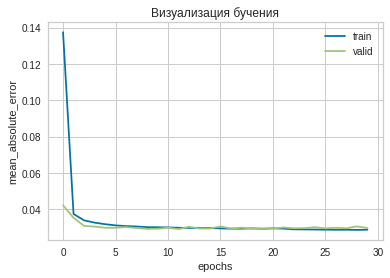

In [85]:
plt.title('Визуализация бучения')
plt.xlabel('epochs')
plt.ylabel('mean_absolute_error')
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'valid')
plt.legend()
plt.show()

Если добавлять слои, плотность или Dropout результат сильно ухудшается. С минимальными параматрами более менее ошибка падает. С Dropout все уходит в ноль.

In [86]:
y_pred =  model.predict(x3_test) 

predicted_values = np.ravel(y_pred) 
actual_values = np.ravel(y3_test) 
df_mx = pd.DataFrame({'Actual': actual_values, 'Predicted': predicted_values})
df_mx.tail()

,Actual,Predicted
277,0.578,0.569065
278,0.795,0.472737
279,0.470,0.609907
280,0.335,0.523571
281,0.553,0.607780


Отрисуем разброс предсказаний

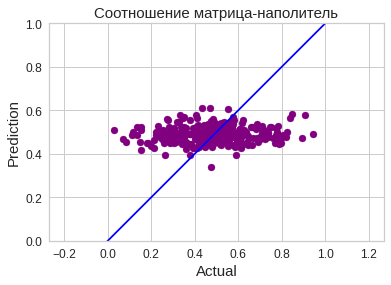

In [87]:

plt.scatter(y3_test, y_pred, color ='purple') 
plt.xlabel('Actual',fontsize=15)
plt.ylabel('Prediction',fontsize=15)
plt.axis('equal')
plt.ylim([0, 1])
plt.xlim([0, 1])
plt.plot([-100, 100], [-100, 100], color ='blue')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(label='Соотношение матрица-наполитель',fontsize=15)
plt.show()

**Оценка точности модели на тренировочном и тестовом датасете**

In [88]:
BM_1=GSCV.best_estimator_
BM_1.fit(x1_train, y1_train)
prediction_train = BM_1.predict(x1_train)
prediction_test = BM_1.predict(x1_test)
mae_train = np.mean(abs(prediction_train - y1_train))
accuracy_train = (1-mae_train)*100
mae_test = np.mean(abs(prediction_test - y1_test))
accuracy_test = (1-mae_test)*100
print('Ridge trian data MAE is = %0.6f, ' % mae_train,
      'Accuracy train data = {:0.2f}%.'.format(accuracy_train))
print('Ridge test data MAE is = %0.6f, ' % mae_test,
      'Accuracy test data = {:0.2f}%.'.format(accuracy_test))

Ridge trian data MAE is = 0.128319,  Accuracy train data = 87.17%.
Ridge test data MAE is = 0.138294,  Accuracy test data = 86.17%.


In [89]:
BM_2=GSCV_RF.best_estimator_
BM_2.fit(x2_train, y2_train)
prediction_train = BM_2.predict(x2_train)
prediction_test = BM_2.predict(x2_test)
mae_train = np.mean(abs(prediction_train - y2_train))
accuracy_train = (1-mae_train)*100
mae_test = np.mean(abs(prediction_test - y2_test))
accuracy_test = (1-mae_test)*100
print('Random Forest train data MAE is = %0.6f, ' % mae_train,
      'Accuracy train data = {:0.2f}%.'.format(accuracy_train))
print('Random Forest test data MAE is = %0.6f, ' % mae_test,
      'Accuracy test data = {:0.2f}%.'.format(accuracy_test))

Random Forest train data MAE is = 0.049243,  Accuracy train data = 95.08%.
Random Forest test data MAE is = 0.138750,  Accuracy test data = 86.12%.
